<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Выявление-определяющих-успешность-игры-закономерностей" data-toc-modified-id="Выявление-определяющих-успешность-игры-закономерностей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Выявление определяющих успешность игры закономерностей</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Подготовка-пользовательских-данных" data-toc-modified-id="Подготовка-пользовательских-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подготовка пользовательских данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Продажи-по-платформам" data-toc-modified-id="Продажи-по-платформам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Продажи по платформам</a></span></li><li><span><a href="#Продажи-игр-топовых-платформ" data-toc-modified-id="Продажи-игр-топовых-платформ-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Продажи игр топовых платформ</a></span></li><li><span><a href="#Продажи-игр-по-регионам" data-toc-modified-id="Продажи-игр-по-регионам-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Продажи игр по регионам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Статистический-анализ-данных" data-toc-modified-id="Статистический-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Статистический анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сравнение-пользовательских-рейтингов" data-toc-modified-id="Сравнение-пользовательских-рейтингов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Сравнение пользовательских рейтингов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Выявление определяющих успешность игры закономерностей 

Интернет-магазин, продающий компьютерные игры по всему миру, хочет спрогнозировать продажи на 2017 год. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Нам нужно выявить определяющие успешность игры закономерности. Это позволит нам сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

Для этого мы проанализируем продажи игр, оценки пользователей и экспертов, жанры, платформы и рейтинг ESRB из открытых источников.

# Изучение данных из файла

In [133]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
#Q-Q-plot
import statsmodels.api as sm

# statistics
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [134]:
# переменная для получения среза за актуальный период, 
# в данном проекте актуальным периодом считается жизненный цикл платформы - от роста до спада продаж.
YEAR_FROM = 2014

# переменная для указания текущего года
THIS_YEAR = 2016

In [135]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

In [136]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [138]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [139]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Построим диаграммы размаха и qq-plot для каждого количественного признака.

<Figure size 648x360 with 0 Axes>

<Figure size 648x360 with 0 Axes>

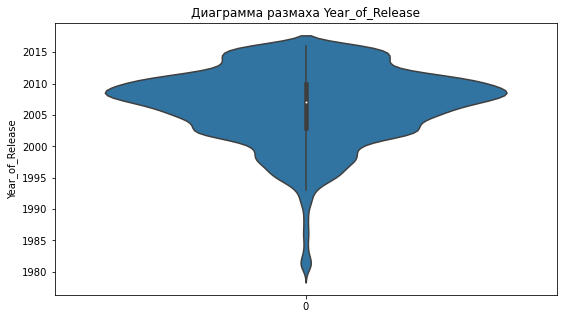

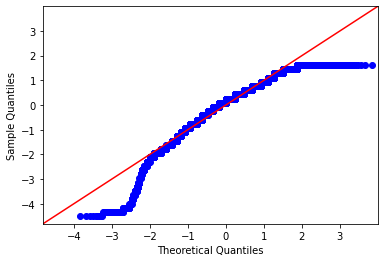

<Figure size 648x360 with 0 Axes>

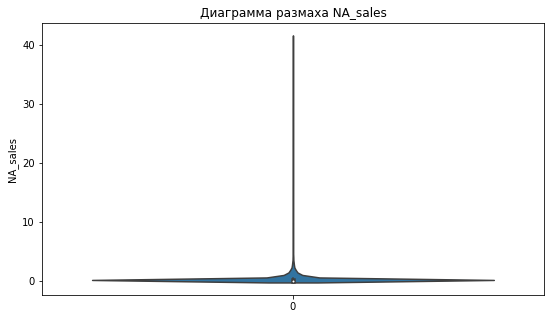

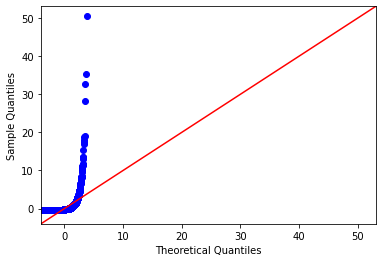

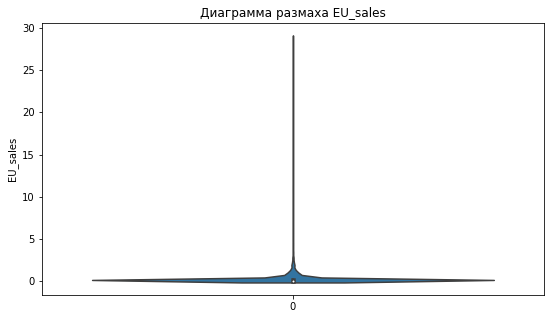

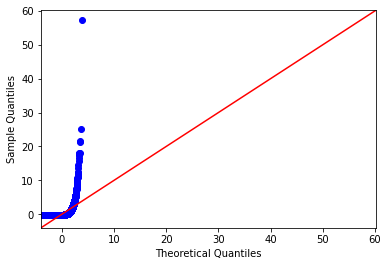

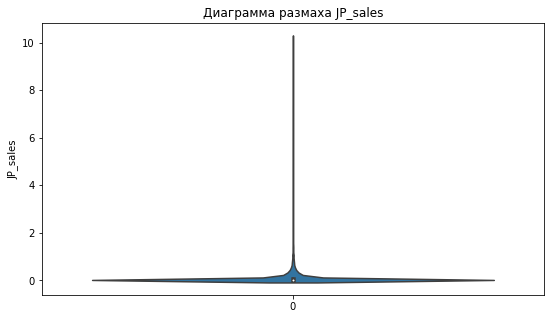

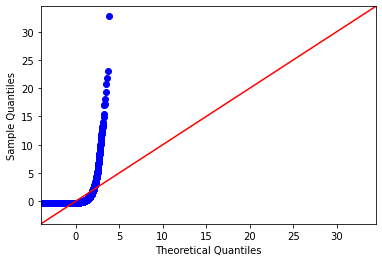

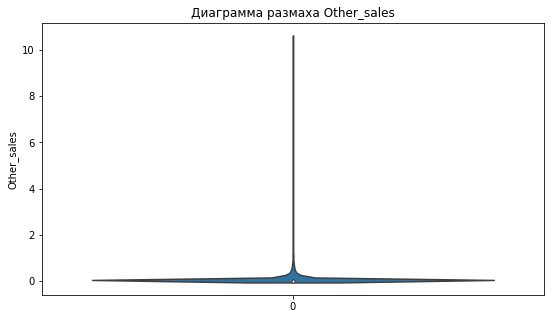

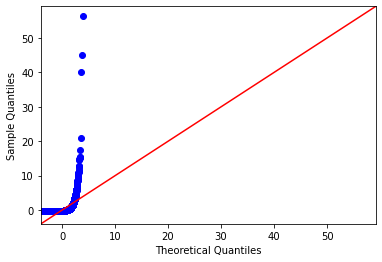

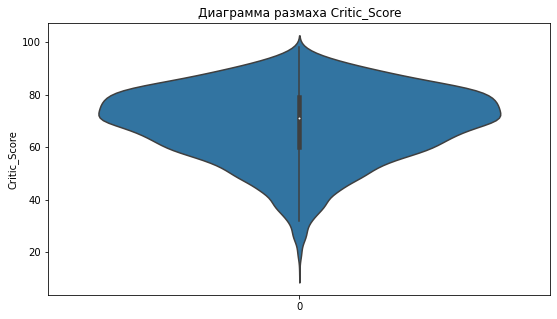

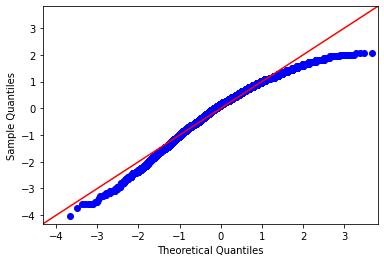

<Figure size 648x360 with 0 Axes>

<Figure size 648x360 with 0 Axes>

In [140]:
for column in df.columns.to_list():
    try:
        # violin plot
        plt.figure(figsize=(9,  5))
        sns.violinplot(data=df[column])

        plt.title('Диаграмма размаха ' + column)
        plt.ylabel(column)
        plt.show()

        # qq plot
        sm.qqplot(df.loc[df[column].notna()][column], fit=True, line="45")
        plt.show()
    except:
        pass

In [141]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


In [142]:
df.duplicated().sum()

0

## Вывод

Имеется один набор данных по играм в разных регионах. В таблице 11 столбцов и 16715 строк.

Данные представлены в виде строковых значений, целых и вещественных чисел.

Диаграммы  размаха показывают наличие явных выбросов в признаках продаж.
Признаки объемов продаж не имеют нормального распределения.

Есть пропущенные значения в шести столбцах - название игры, год выпуска, жанр, оценка критиков и пользователей, рейтинг. Пропусков в столбцах оценка критиков и пользователей, а также рейтинг больше 40 процентов.
Аномальных значений и полных дубликатовне не выявлено.

# Предобработка данных

Приведём названия всех столбцов к нижнему регистру.

In [143]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Обработка дубликатов

Проверим дубликаты по столбцам с названием игры и платформы, годом выпуска.

In [144]:
duplicates = df.loc[df.duplicated(subset=['name', 'platform', 'genre'])]

Нашлись пять строк, имеющие дубликаты по трем столбцам. Найдём эти строки и проверим их значения.

In [145]:
df.loc[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Так как игра "Need for Speed: Most Wanted" выходила два раза (второй раз в виде обновления), 
присвоим поздней версии значение с пометкой "Обновление" - "Need for Speed: Most Wanted (Update)", чтобы избежать дубликатов в последующей обработке данных.

In [146]:
df.loc[(df['name'] == 'Need for Speed: Most Wanted') & (df['year_of_release'] != 2005), 'name'] = 'Need for Speed: Most Wanted (Update)'
df.loc[(df['name'] == 'Need for Speed: Most Wanted (Update)')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
523,Need for Speed: Most Wanted (Update),PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted (Update),X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
2048,Need for Speed: Most Wanted (Update),PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
6273,Need for Speed: Most Wanted (Update),WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
11715,Need for Speed: Most Wanted (Update),PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


Проверим остальные дубликаты.

In [147]:
df.loc[(df['name'] == 'Sonic the Hedgehog') & (df['name'].isin(duplicates['name']))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Мы видим, что последняя строка имеет дубликат для платформы "PS3" выше имеет значение дохода только по Европе, 
возможно этот доход был добавлен позже, поэтому получился дубликат.

Добавим в заполненную строку большее значение дохода, а пустую удалим.

In [148]:
df.loc[1745, 'eu_sales'] = 0.48
df.loc[1745]

name               Sonic the Hedgehog
platform                          PS3
year_of_release                2006.0
genre                        Platform
na_sales                         0.41
eu_sales                         0.48
jp_sales                         0.04
other_sales                      0.66
critic_score                     43.0
user_score                        4.1
rating                           E10+
Name: 1745, dtype: object

In [149]:
df.loc[4127] = df.loc[4127].drop(inplace=True, columns=df.columns, axis=0)
df.loc[4127]

name               None
platform           None
year_of_release     NaN
genre              None
na_sales            NaN
eu_sales            NaN
jp_sales            NaN
other_sales         NaN
critic_score        NaN
user_score         None
rating             None
Name: 4127, dtype: object

In [150]:
df.loc[df['name'] == 'Madden NFL 13'] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Здесь виден дубликат для той же платформы - "PS3", 
строка не содержит значений в столбцах с доходами, кроме столбца по Европе. 
Так как в полной строке имеются большие значения, оставим её, а пустую строку удалим.

In [151]:
df.loc[16230] = df.loc[4127].drop(inplace=True, columns=df.columns, axis=0)
df.loc[16230]

name               None
platform           None
year_of_release     NaN
genre              None
na_sales            NaN
eu_sales            NaN
jp_sales            NaN
other_sales         NaN
critic_score        NaN
user_score         None
rating             None
Name: 16230, dtype: object

## Замена типа данных

Заменим некоторые типы данных на более экономичные по размеру.

In [152]:
df['year_of_release'] = df['year_of_release'].astype('Int16')
df['na_sales'] = df['na_sales'].astype('float32')
df['eu_sales'] = df['eu_sales'].astype('float32')
df['jp_sales'] = df['jp_sales'].astype('float32')
df['other_sales'] = df['other_sales'].astype('float32')
df['critic_score'] = df['critic_score'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16445 non-null  Int16  
 3   genre            16711 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     8135 non-null   float32
 9   user_score       10012 non-null  object 
 10  rating           9947 non-null   object 
dtypes: Int16(1), float32(5), object(5)
memory usage: 1.0+ MB


In [153]:
df.groupby('user_score')['user_score'].count()

user_score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: user_score, Length: 96, dtype: int64

В столбце с оценкой пользователей присутсвуют строковые значения "tbd" - "to be decided", это означает, что оценки пока ещё нет. 

Такие строковые значения препятсвуют смене типа данных в этой колонке, поэтому заменим их на NaN, чтобы они не учитывались при анализе данных. 
При финальном проверке гипотез отфильтруем такие значения.

In [154]:
df['user_score'].isna().sum()

6703

In [155]:
df.loc[df['user_score'] == 'tbd'] = df.loc[df['user_score'] == 'tbd'].drop(columns='user_score', axis=1)
df['user_score'].isna().sum()

9127

In [156]:
df['user_score'] = df['user_score'].astype('float32').round(1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN


In [157]:
# повторная проверка данных после изменения типов
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16445.000000,16713.000000,16713.000000,16713.000000,16713.000000,8135.000000,7588.000000
mean,2006.484281,0.263386,0.145084,0.077629,0.047352,68.969147,7.125689
std,5.877071,0.813645,0.503337,0.308822,0.186758,13.936079,1.499688
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360001,28.959999,10.220000,10.570000,98.000000,9.700000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16445 non-null  Int16  
 3   genre            16711 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     8135 non-null   float32
 9   user_score       7588 non-null   float32
 10  rating           9947 non-null   object 
dtypes: Int16(1), float32(6), object(4)
memory usage: 963.2+ KB


## Обработка пропусков

In [159]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.020000
platform,0.010000
year_of_release,1.620000
genre,0.020000
na_sales,0.010000
eu_sales,0.010000
jp_sales,0.010000
other_sales,0.010000
critic_score,51.330000
user_score,54.600000


Больше 40 процентов пропусков находится в столбцах оценка критиков, оценка пользователей и рейтинг, их заполнение медианным или средним значением сильно исказит итоговые результаты. Поэтому такие значения целесообразнее всего оставить как есть, а для проверки гипотез их опустить. Для исследования рейтинга заменим пропущенные значения в данном столбце значением "undefined" (не определен).

In [160]:
df['rating'] = df['rating'].fillna('undefined')
df['rating'].isna().sum()

0

In [161]:
df.isna().sum()

name                  4
platform              2
year_of_release     270
genre                 4
na_sales              2
eu_sales              2
jp_sales              2
other_sales           2
critic_score       8580
user_score         9127
rating                0
dtype: int64

Удалим строки с пропусками в столбцах с названием игры, платформы и с годом выпуска, т.к. они не представляют пользы для дальнейшего анализа.
Строки с пропусками в столбцах с жанром или продажами могут также использоваться при анализе по продажам или жанрам.

In [162]:
df.dropna(subset=['name', 'platform', 'year_of_release', 'genre'], axis=0, inplace=True)

In [163]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

## Подготовка пользовательских данных

Создадим новый столбец с суммарными продажами для последующего анализа данных.

In [31]:
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,undefined,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,undefined,31.380001


Проверим корректность значений в названиях платформ.

In [32]:
df.groupby('platform')['platform'].count()

platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1329
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

## Вывод

Была проведена следующая предобработка данных:
- регистр в названиях столбцов изменён на нижний;
- обработаны дубликаты по трём параметрам;
- типы данных изменены на более подходящие для анализа и менее ресурсо-затратные;
- обработаны пропуски в столбце с названием игры, а также выборочно обработаны пропуски в столбце с пользовательским рейтингом (для проверки гипотез);
- создан новый столбец с суммарными продажами по всем имеющимся регионам.

Больше 40 процентов пропусков находится в столбцах оценка критиков, оценка пользователей и рейтинг, их заполнение медианным или средним значением сильно исказит итоговые результаты. 
Поэтому такие значения мы оставили как есть, а для проверки гипотез создали отдельную таблицу без пропущенных значений в необходимых столбцах - оценка критиков и оценка пользователей.

Пропуски могли возникнуть в результате получения неполных данных, например, данные за текущий год скорее всего являются не полными, а также могут отсутствовать оценки у некоторых игр.

# Исследовательский анализ данных

Посмотрим сколько игр выпускалось каждый год в сумме для разных платформ.

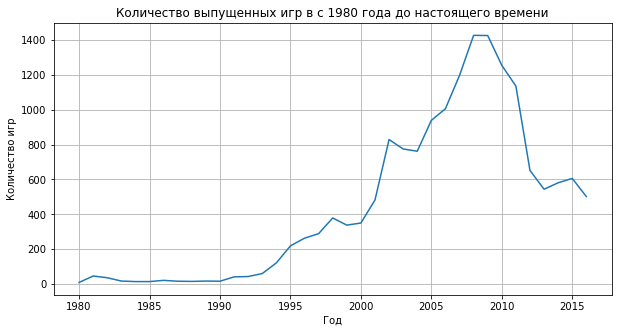

In [33]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count' ).plot(grid=True, figsize=(10, 5), legend=None)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр в с 1980 года до настоящего времени')
plt.show()

График показывает значительное увеличение количества игр с течением времени. Для нас важны более поздние данные, т.к. они будут наиболее релевантными.

## Продажи по платформам

Найдём платформы с наибольшими суммарными продажами за все года.

In [34]:
# строим сводную таблицу по суммарным продажам за все года, избавляемся от мультииндекса, 
# сортируем по убыванию и выводим первые 15 строк
pivot_sales = df.pivot_table(index=['platform'], values='sales_total', aggfunc='sum').reset_index().sort_values(by='sales_total', ascending=False)
pivot_sales.head(15)

,platform,sales_total
16,PS2,1255.770020
28,X360,971.419983
17,PS3,939.580017
26,Wii,907.510010
4,DS,806.119995
15,PS,730.859985
6,GBA,317.850006
18,PS4,314.140015
19,PSP,294.049988
13,PC,259.519989


В столбце с продажами видны шесть явных лидеров среди платформ, т.к. седьмая отстаёт от шестой больше чем в два раза.

Сохраним в переменную первые шесть платформ и построим график их доходов по годам.

In [35]:
top_sales = pivot_sales.head(6)
top_sales

,platform,sales_total
16,PS2,1255.770020
28,X360,971.419983
17,PS3,939.580017
26,Wii,907.510010
4,DS,806.119995
15,PS,730.859985


In [36]:
# сводная таблица доходов топовых платформ за весь период их существования
df_top6 = df.loc[df['platform'].isin(top_sales['platform'])]
df_top6_pivot = df_top6.pivot_table(index=['platform', 'year_of_release'], values='sales_total', aggfunc='sum' ).reset_index()

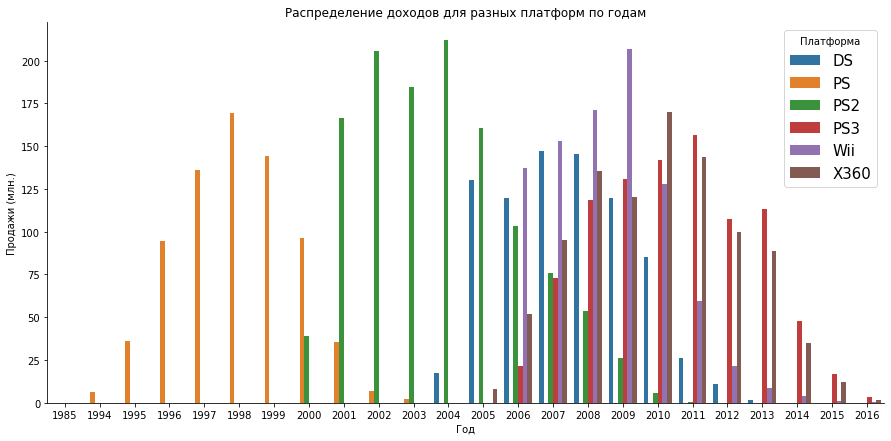

In [37]:
# размер графика
plt.figure(figsize=(15, 7))

# сгруппированная столбчатая диаграмма
fig = sns.barplot(
    x="year_of_release", 
    y="sales_total", 
    hue="platform", 
    data=df_top6_pivot, 
    ci=None
    )

# подписи осей и легенда
fig.set_title("Распределение доходов для разных платформ по годам")
fig.set_ylabel("Продажи (млн.)")
fig.set_xlabel("Год")
fig.legend(prop={'size': 15}, title = 'Платформа');

# убираем верхнюю и правую границу графика
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

Жизненный цикл платформы длится около 10 лет, но спад продаж начинается уже спустя пять лет.
Поэтому для дальнейших расчетов будем использовать актуальный период - 3 года.

Найдём, какие платформы лидируют по продажам.

In [38]:
# сохраняем срез за актуальный период в переменную

df_recent = df.loc[df['year_of_release'] >= YEAR_FROM]

# строим сводную таблицу по суммарным продажам, избавляемся от мультииндекса, 
# сортируем по убыванию и выводим верхние строки
df_recent_top_sales = df_recent.pivot_table(index=['platform'], values='sales_total', aggfunc='sum').\
                                  reset_index().\
                                  sort_values(by='sales_total', ascending=False).\
                                  head(6)

Посмотрим, как распределяются продажи разных платформ по годам за актуальный период.

In [39]:
# сохраним в переменную все данные за актуальный период только для топовых платформ
df_recent_top = df_recent.loc[df['platform'].isin(df_recent_top_sales['platform'])]

In [40]:
# создаем сводную таблицу по суммарным продажам для топовых платформ за актуальный период
df_recent_top6 = df_recent_top.pivot_table(index=['platform', 'year_of_release'], values='sales_total', aggfunc='sum').\
                               reset_index()

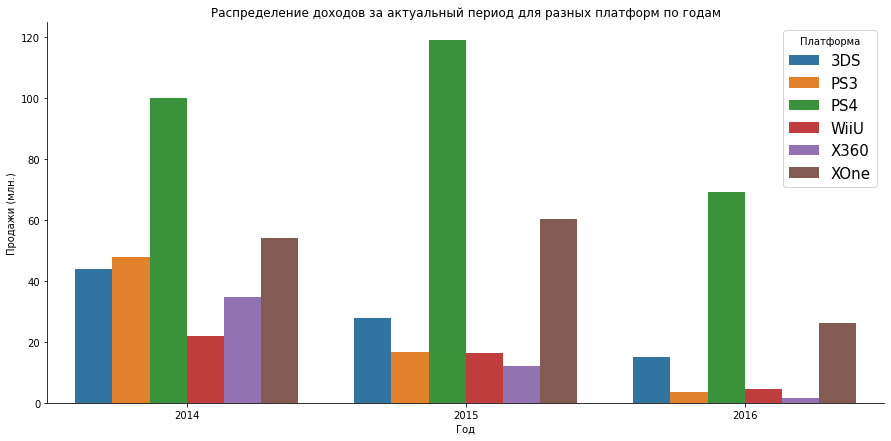

In [41]:
# размер графика
plt.figure(figsize=(15, 7))

# сгруппированная столбчатая диаграмма
fig = sns.barplot(
    x="year_of_release", 
    y="sales_total", 
    hue="platform", 
    data=df_recent_top6, 
    ci=None
    )

# подписи осей и легенда
fig.set_title("Распределение доходов за актуальный период для разных платформ по годам")
fig.set_ylabel("Продажи (млн.)")
fig.set_xlabel("Год")
fig.legend(prop={'size': 15}, title = 'Платформа');

# убираем правую и верхную границу графика
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

Лидируют по продажам игры для платформ "PS4" и "XOne".

На текущий момент растут продажи игр для платформы "PS4" и "XOne", а для платформ "PS3", "3DS", "X360", "WiiU" продажи снижаются.

Посмотрим на размах доходов от игр для топовых платформ.

In [42]:
# делаем сводную таблицу с играми за за актуальный период для топовых платформ
recent_games_sales = df_recent_top.pivot_table(index=['name', 'platform'], values=['sales_total'], aggfunc='sum').\
                                   reset_index()

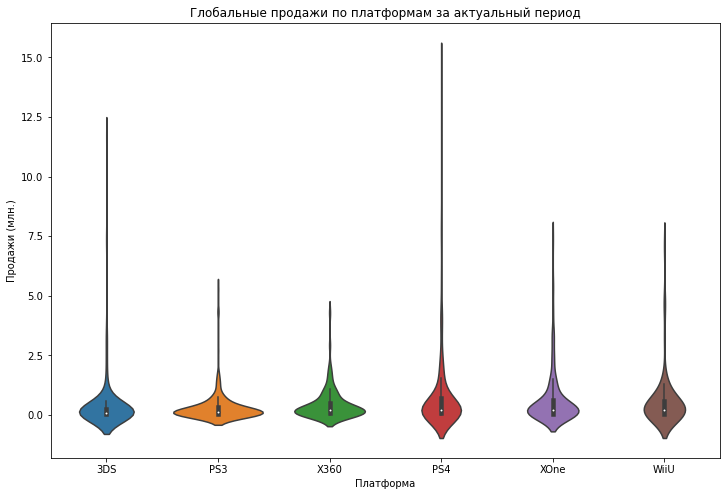

In [43]:
plt.figure(figsize=(12, 8))
sns.violinplot( x='platform', y='sales_total', data=recent_games_sales)

plt.title("Глобальные продажи по платформам за актуальный период", loc="center")
plt.xlabel("Платформа")
plt.ylabel("Продажи (млн.)")
plt.show()

График показывает, что разброс значений суммарных доходов очень велик. Имеется множество выбросов, лидируют по выбросам платформы "3DS" и "PS4". Более сконцентрированные значения доходов у платформ "PS3" и "X360".

## Продажи игр топовых платформ

Проверим, как влияют на продажи отзывы пользователей и критиков внутри одной платформы.

Продажи игр на платформе 3DS

Коэффициент корреляции Пирсона между продажами и оценкой критиков 0.3141175089898559
Коэффициент корреляции Пирсона между продажами и оценкой пользователей 0.2151932834526409



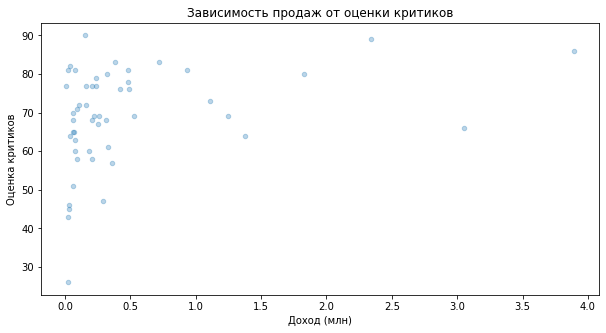

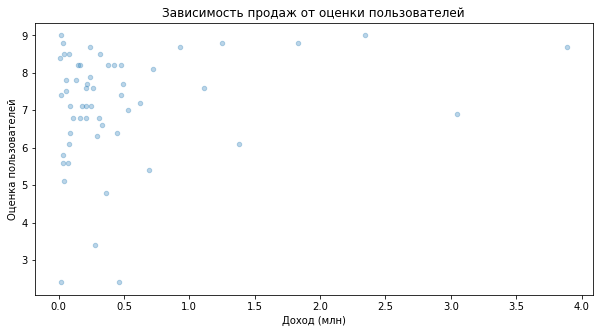

----------------------------------------------------------------------------------
Продажи игр на платформе PS3

Коэффициент корреляции Пирсона между продажами и оценкой критиков 0.4465746125285382
Коэффициент корреляции Пирсона между продажами и оценкой пользователей -0.16676141314427373



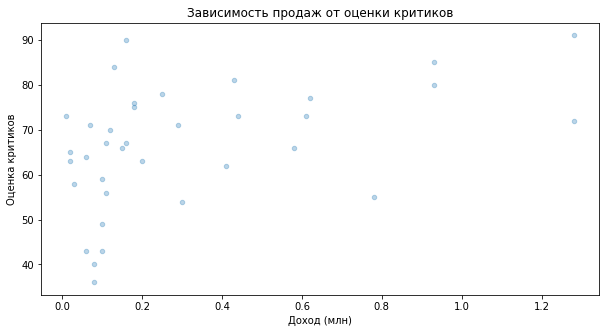

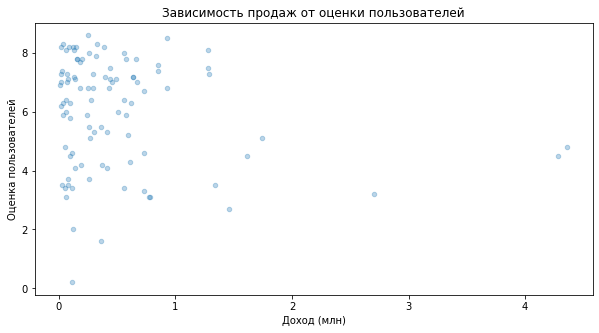

----------------------------------------------------------------------------------
Продажи игр на платформе PS4

Коэффициент корреляции Пирсона между продажами и оценкой критиков 0.40266140969679703
Коэффициент корреляции Пирсона между продажами и оценкой пользователей -0.04013158656330136



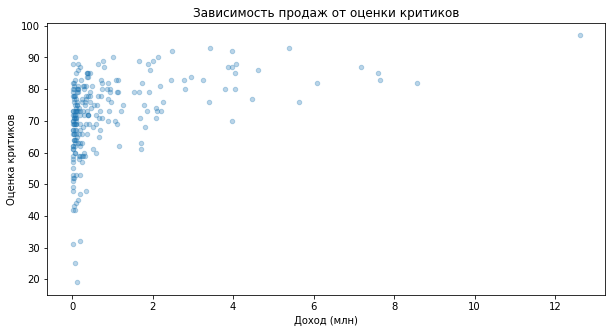

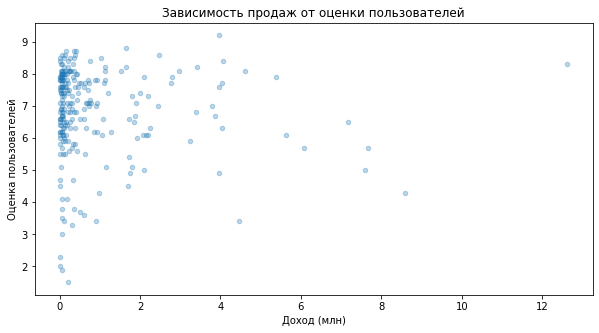

----------------------------------------------------------------------------------
Продажи игр на платформе WiiU

Коэффициент корреляции Пирсона между продажами и оценкой критиков 0.3702014115978713
Коэффициент корреляции Пирсона между продажами и оценкой пользователей 0.4079264684167125



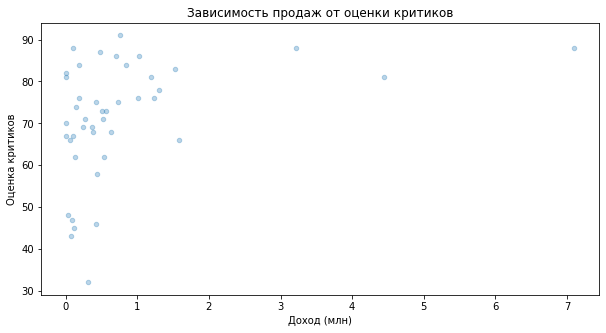

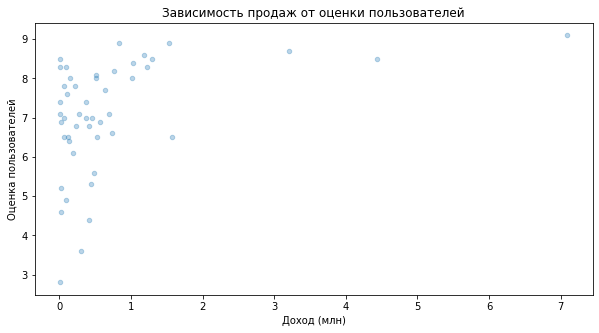

----------------------------------------------------------------------------------
Продажи игр на платформе X360

Коэффициент корреляции Пирсона между продажами и оценкой критиков 0.5257228260002178
Коэффициент корреляции Пирсона между продажами и оценкой пользователей -0.13844458335811335



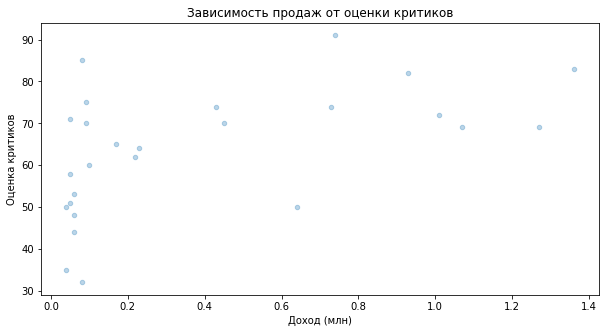

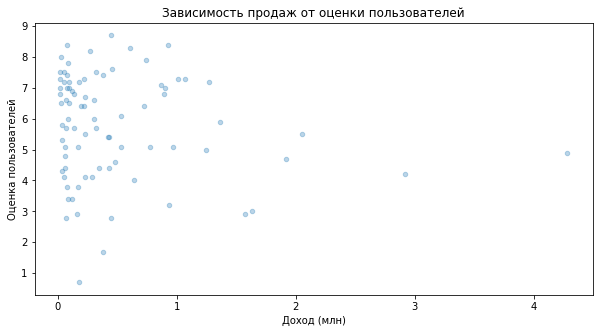

----------------------------------------------------------------------------------
Продажи игр на платформе XOne

Коэффициент корреляции Пирсона между продажами и оценкой критиков 0.42867694200785234
Коэффициент корреляции Пирсона между продажами и оценкой пользователей -0.07038393650888485



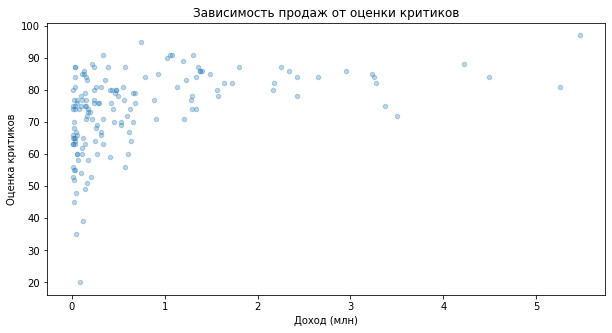

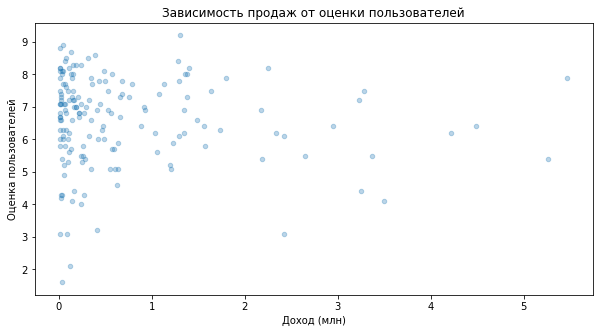

----------------------------------------------------------------------------------


In [44]:
for item in df_recent_top6['platform'].unique():
    
    platform = df_recent_top.loc[(df_recent_top['platform'] == item) & (df_recent_top['user_score'] != -1)]
    print('Продажи игр на платформе', item)
    print()
    print('Коэффициент корреляции Пирсона между продажами и оценкой критиков', 
          platform['sales_total'].corr(platform['critic_score']))
    print('Коэффициент корреляции Пирсона между продажами и оценкой пользователей', 
          platform['sales_total'].corr(platform['user_score']))
    print()

    platform.plot(x='sales_total', y='critic_score', kind='scatter', alpha=0.3, figsize=(10, 5))
    plt.xlabel('Доход (млн)')
    plt.ylabel('Оценка критиков')
    plt.title('Зависимость продаж от оценки критиков')
    plt.show()

    platform.plot(x='sales_total', y='user_score', kind='scatter', alpha=0.3, figsize=(10, 5))
    plt.xlabel('Доход (млн)')
    plt.ylabel('Оценка пользователей')
    plt.title('Зависимость продаж от оценки пользователей')
    plt.show()
    
    print('----------------------------------------------------------------------------------')

Корреляция между продажами и оценкой пользователей является отрицательной и практически отсутсвует для всех платформ, кроме небольшой корреляции для платформы "WiiU".
Есть небольшая корреляция между продажами и оценкой критиков для всех актуальных платформ.

Графики показывают, что несмотря на высокие оценки критиков и пользователей, множество игр имеют невысокий доход.
В то же время, игры с высокими доходами имееют только хорошие оценки критиков. Оценки пользователей не коррелируют с доходами игр, т.е. есть игры с высоким доходом и невысокими оценками пользователей.

----------------------------

Проверим общее распределение продаж игр по жанрам.

In [45]:
df_recent_genres_sales = df_recent_top.pivot_table(index='genre', values='sales_total', aggfunc=['sum', 'mean', 'median']).reset_index()
df_recent_genres_sales.columns = ['genre', 'sales_total', 'mean_sales', 'median_sales']
df_recent_genres_sales

,genre,sales_total,mean_sales,median_sales
0,Action,185.160004,0.405164,0.120
1,Adventure,14.640000,0.149388,0.060
2,Fighting,27.430000,0.537843,0.150
3,Misc,30.910000,0.351250,0.110
4,Platform,17.840000,0.540606,0.160
5,Puzzle,2.150000,0.179167,0.050
6,Racing,26.780001,0.505283,0.130
7,Role-Playing,90.470001,0.628264,0.170
8,Shooter,164.509995,1.551981,0.680
9,Simulation,6.490000,0.282174,0.120


In [46]:
def genres_sales(column, ytext):
    # размер графика
    plt.figure(figsize=(12, 5))

    # столбчатая диаграмма по группам
    fig = sns.barplot(
        x="genre", 
        y=column, 
        data=df_recent_genres_sales,
        ci=None
        )

    # подписи осей и заголовок
    fig.set_title("Распределение доходов за актуальный период для разных жанров")
    fig.set_ylabel(ytext)
    fig.set_xlabel("Жанры")

    # убираем верхнюю и правую границу графика
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)

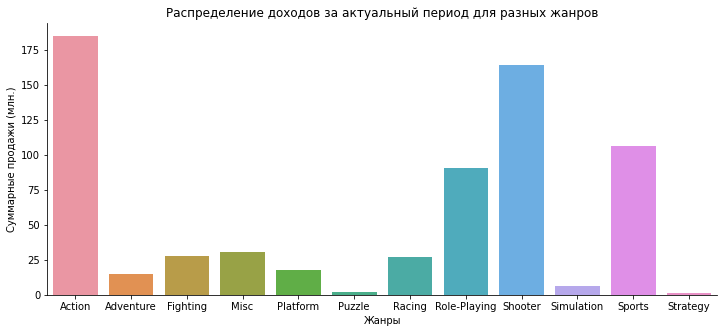

In [47]:
genres_sales('sales_total', 'Суммарные продажи (млн.)')

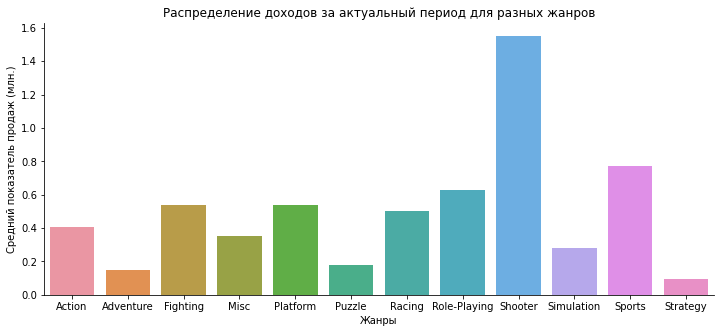

In [48]:
genres_sales('mean_sales', 'Средний показатель продаж (млн.)')

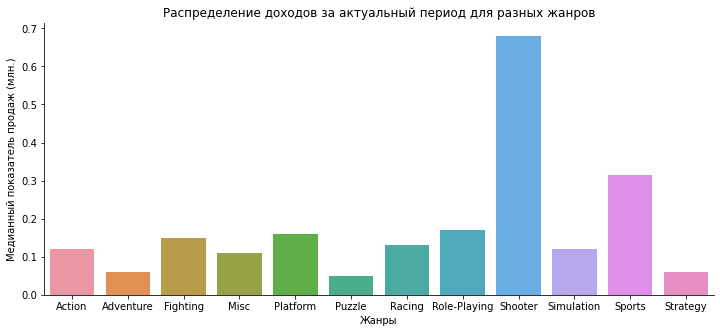

In [49]:
genres_sales('median_sales', 'Медианный показатель продаж (млн.)')

Жанр "Action" и "Shooter" лидирует по суммарным доходам за актуальный период. За ними следуют жанры "Shooter" и "Sports". 
Жанры "Strategy" и "Puzzle" имеют минимальные доходы.

Но по средним и медианным показателям лидирует жанр "Shooter", на втором месте жанр находится жанр "Sports".

## Продажи игр по регионам

In [50]:
# функция для построения сводных таблиц продаж по заданному столбцу
def region_top(column, text):
    
    # создаём список с названиями столбцов регионов
    regions = ['na_sales', 'eu_sales', 'jp_sales']

    for region in regions:
        df_recent_region = df_recent.pivot_table(index=column, values=region, aggfunc='sum').\
                                            reset_index().\
                                            sort_values(by=region, ascending=False).\
                                            head(10)
        
        # строим столбчатую диаграмму
        plt.figure(figsize=(10, 7))

        fig = sns.barplot(
            x=column, 
            y=region, 
            data=df_recent_region,
            ci=None
            )

        # подписи осей и заголовок
        fig.set_title("Распределение продаж " + region)
        fig.set_ylabel("Продажи (млн.)")
        fig.set_xlabel(column)

        # убираем верхнюю и правую границу графика
        fig.spines['top'].set_visible(False)
        fig.spines['right'].set_visible(False)

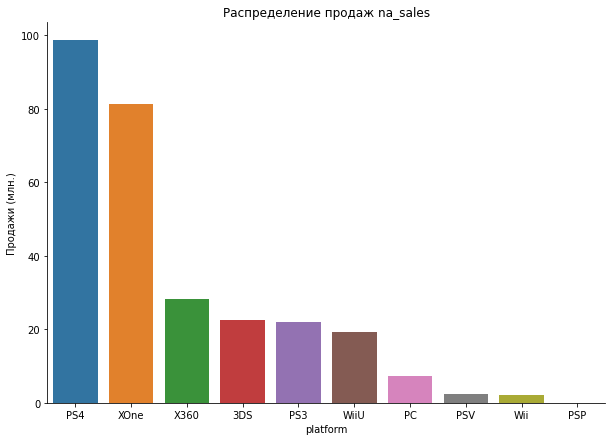

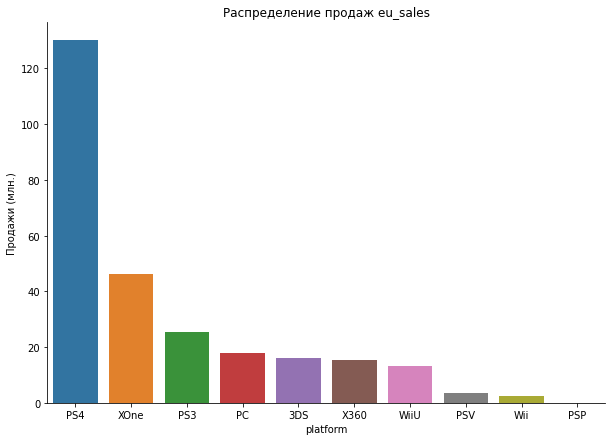

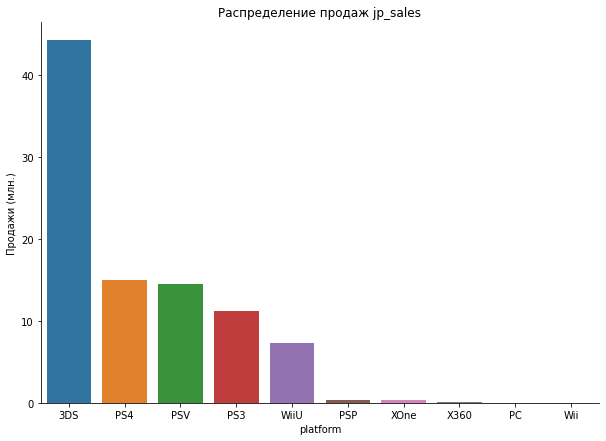

In [51]:
region_top('platform', 'Самые прибыльные платформы')

Общие данные за актульный период.

В Северной Америке и Европе лидируют игры для платформы "PS4", а в Японии - "3DS". 

----------------------------

Проверим продажи по платформам за текущий год в каждом регионе.

In [52]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    df_recent_region = df_recent.pivot_table(index=['platform', 'year_of_release'], values=region, aggfunc='sum').\
                                            reset_index().\
                                            sort_values(by=region, ascending=False)
    print('Продажи в', region)
    display(df_recent_region.loc[df_recent_region['year_of_release'] == THIS_YEAR].head())
    print('----------------------------------------')

Продажи в na_sales


,platform,year_of_release,na_sales
11,PS4,2016,21.49
28,XOne,2016,14.27
2,3DS,2016,4.14
22,WiiU,2016,2.10
5,PC,2016,1.36


----------------------------------------
Продажи в eu_sales


,platform,year_of_release,eu_sales
11,PS4,2016,31.780001
28,XOne,2016,9.630000
5,PC,2016,3.530000
2,3DS,2016,2.330000
22,WiiU,2016,1.480000


----------------------------------------
Продажи в jp_sales


,platform,year_of_release,jp_sales
2,3DS,2016,8.03
11,PS4,2016,5.74
16,PSV,2016,3.56
8,PS3,2016,1.30
22,WiiU,2016,0.67


----------------------------------------


За последний год в Северной Америке и Европе лидирует платформа "PS4", в Японии она находится на втором месте по продажам, 
а первое занимает платформа "3DS".

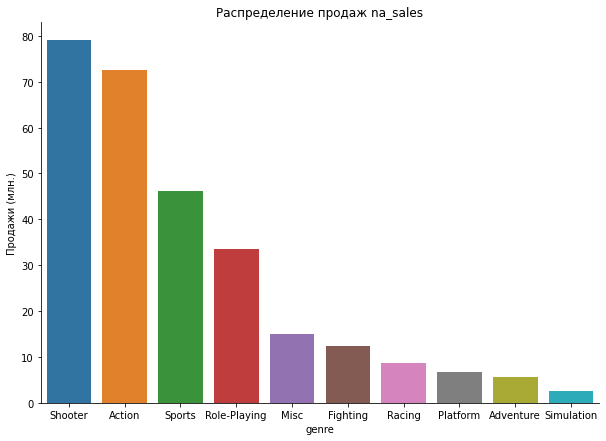

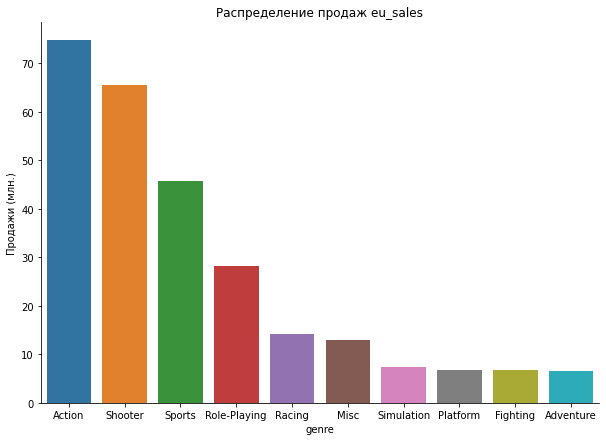

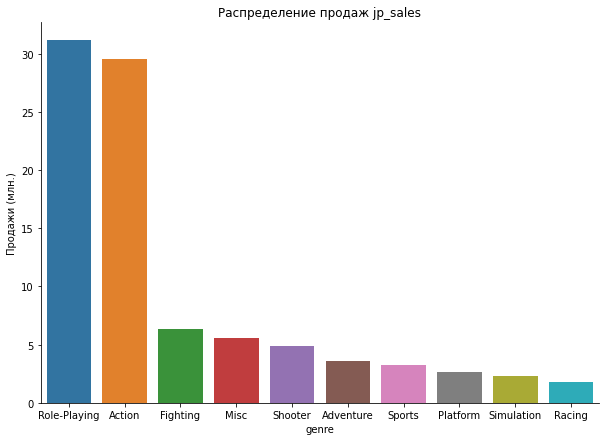

In [53]:
region_top('genre', 'Самые прибыльные жанры')

В Северной Америке лидирует жанр "Shooter", в Европе - жанр 'Action', а в Японии - 'Role-Playing'.

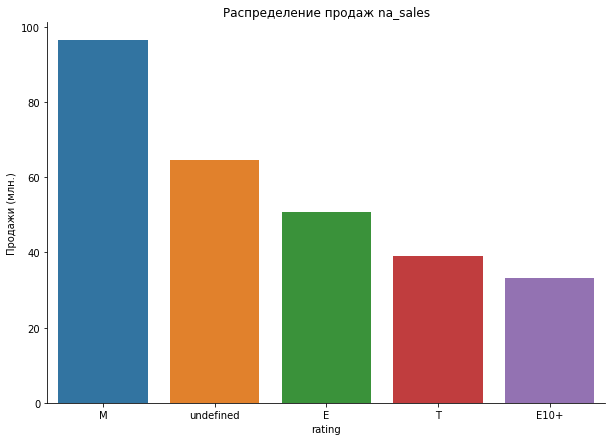

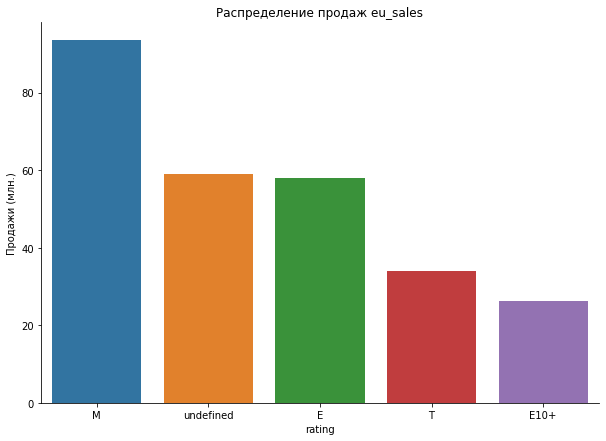

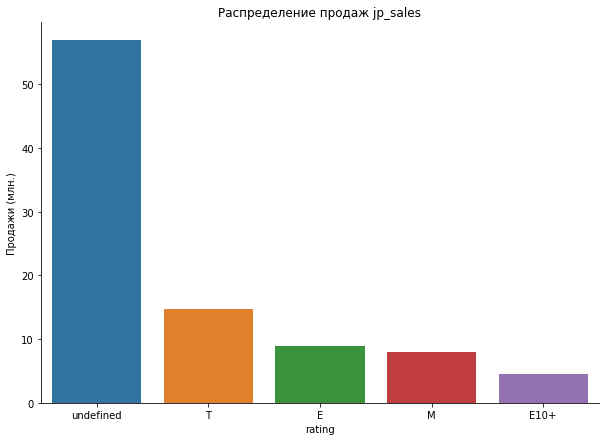

In [54]:
region_top('rating', 'Самые прибыльные типы рейтинга ESRB')

In [55]:
df_recent.groupby('rating')['rating'].count()

rating
E            219
E10+         185
M            265
T            271
undefined    749
Name: rating, dtype: int64

В Северной Америке и Европе лидируют игры с рейтингом "M" ("Mature"), доступные старше 17 лет.
В Японии по продажам лидируют игры с рейтингом "undefined" - это игры, у которых не было указано рейтинга. 
Так как организация, присваивающая рейтинг является американской, возможно те игры, которые популярны в Японии не используют данный рейтинг.

## Вывод

Лидируют по продажам игры для платформ "PS4" и "XOne".
В Северной Америке и Европе по продажам лидируют игры для платформы "PS4", а в Японии - "3DS".

Тем не менее, на момент 2016 года растут продажи игр для платформы "PS4" и "XOne", а для платформ "PS3", "X360", "3DS", "UWii" продажи снижаются.

За последний год в Северной Америке и Европе лидирует платформа "PS4", в Японии она находится на втором месте по продажам, 
а первое занимает платформа "3DS".

Корреляция между продажами и оценкой пользователей практичестки отсутствует для всех платформ. 
Есть небольшая корреляция между продажами и оценкой критиков для платформ "PS3", "PS4" и "XOne".

Графики показывают, что несмотря на высокие оценки критиков и пользователей, множество игр имеют невысокий доход.
В то же время, игры с высокими доходами имееют только хорошие оценки критиков. Оценки пользователей меньше коррелируют с доходами игр, т.е. есть игры с высоким доходом и невысокими оценками пользователей.

Жанры "Action" и "Shooter" находятся в лидерах по доходности за актуальный период. 
За ними следует жанр "Sports". Однако по средним и медианным показателям в лидерах находится только жанр "Shooter".
Жанры "Strategy" и "Puzzle" имеют минимальные доходы.

В Северной Америке и Европе по продажам лидирует жанр "Action", а в Японии лидируют игры без рейтинга организации ESBR.

# Статистический анализ данных

## Сравнение пользовательских рейтингов

Сравним пользовательские рейтинги платформ "Xbox One" и "PC".

Для этого сформулируем нулевую гипотезу: пользовательские рейтинги платформ "Xbox One" и "PC" являются одинаковыми. 
Тогда альтернативная гипотеза - пользовательские рейтинги платформ "Xbox One" и "PC" являются различными.

In [56]:
# сохраняем срезы в переменные
xbox_one = df_recent.loc[df['platform'] == 'XOne']
pc = df_recent.loc[df['platform'] == 'PC']

action = df_recent.loc[df['genre'] == 'Action']
sports = df_recent.loc[df['genre'] == 'Sports']

In [57]:
# тест для проверки гипотез

# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = 0.05 

results = st.ttest_ind(xbox_one['user_score'], pc['user_score'], equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.1160137942843255
Не получилось отвергнуть нулевую гипотезу


In [58]:
print('Средний пользовательский рейтинг платформы "Xbox One" равен:', xbox_one['user_score'].mean())
print('Средний пользовательский рейтинг платформы "PC" равен:', pc['user_score'].mean())

Средний пользовательский рейтинг платформы "Xbox One" равен: 6.594542980194092
Средний пользовательский рейтинг платформы "PC" равен: 6.298359394073486


----------------------------

Сравним пользовательские рейтинги жанров "Action" и "Sports".

Для этого сформулируем нулевую гипотезу: пользовательские рейтинги платформ "Action" и "Sports" являются одинаковыми. 
Тогда альтернативная гипотеза - пользовательские рейтинги платформ "Action" и "Sports" являются различными.

In [59]:
# тест для проверки гипотез

# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = 0.05 

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1825796838209034e-14
Отвергаем нулевую гипотезу


In [60]:
print('Средний пользовательский рейтинг жанра "Action" равен:',action['user_score'].mean())
print('Средний пользовательский рейтинг жанра "Sports" равен:', sports['user_score'].mean())

Средний пользовательский рейтинг жанра "Action" равен: 6.760608196258545
Средний пользовательский рейтинг жанра "Sports" равен: 5.225196361541748


## Вывод

Проверка гипотез по платформам показала, что по наблюдаемым данным можно сделать вывод, что, скорее всего, 
наше предположение всё-таки верно и средние пользовательские рейтинги платформ "Xbox One" и "PC"  не различаются.

Проверка гипотез по жанрам показала, что по наблюдаемым данным можно сделать вывод, что, скорее всего, 
наше предположение всё-таки неверно и средние пользовательские рейтинги жанров "Action" и "Sports" различаются - рейтинг жанра "Action" выше, чем для жанра "Sports".

Для проверки гипотез было использован критерий Сьюдента (st.test_ind), которые использует значение p-value, 
показывающее вероятность получить равное значение средних пользовательских рейтингов двух платформ и жанров. 

Аргументу "equal_var" ("равная дисперсия") был задано значение "False", т.к. нам не известно ничего о равенстве дисперсий двух платформ и жанров, а значит предполагается, что дисперсии двух генеральных совокупностей не равны, т.к. это две независимые выборки.
Это позволяет наиболее точно проверить вероятность схожего значения средних пользовательских рейтингов.

# Общий вывод

Анализ данных показал, что наиболее перспективной платформой является "PS4", 
продажи для остальных платформ гораздо ниже,
в то же время, в Японии за последний год продажи выше у платформы "3DS".

Наиболее перспективный жанр для Северной Америки и Европы - "Action", а в Японии - "Role-Playing".

Также, исследование показало, что в некоторой степени можно опираться на оценки критиков для выбора перспективных игр, 
т.к. практически отсутствуют игры с высокой оценкой и низким доходом.
Однако не стоит руководствоваться оценкой пользователей, т.к. корреляция с доходом практичестки отсутствует для всех платформ. 

----------------------------------------------------------------------------------------
Жанры "Action" и "Shooter" находятся в лидерах по доходности за актуальный период. 
За ними следует жанр "Sports".
Жанры "Strategy" и "Puzzle" имеют минимальные доходы.

В Северной Америке и Европе по продажам лидирует жанр "Action", а в Японии лидируют игры без рейтинга организации ESBR.

Гипотеза о схожести пользовательских рейтингов платформ "Xbox One" и "PC" была потверждена, 
а жанров "Action" и "Sports" не были подтверждена. Значит, вероятно, пользовательские рейтинги данных жанров отличаются. 

Средний рейтинг игр для платформы "Xbox One", возможно, не различается с платформой "PC".
Средний рейтинг игр жанра "Action", возможно, выше, чем рейтинг жанра "Sports".

-----------------------------------------------------------------------------------------
Рекомендации:

Принимая во внимание вышеупомянутое, успешными играми на будущий год можно считать игры для платформы "PS4", продаваемые в Северной Америке и Европе, а также игры для платформы "3DS" для Японии. 

Перспективные жанры: "Shooter", "Action" в Северной Америке и Европе, а также "Role-Playing" и "Action" в Японии.
Кроме того, игры с рейтингом "М" возможно будут иметь продажи выше, чем остальные.